In [168]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV  # for train/test split


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.pipeline import Pipeline



import matplotlib.pyplot as plt
import seaborn as sb

In [169]:

Assuage_df = pd.read_csv('data/assuage_binary_corro_data.csv', header=0)


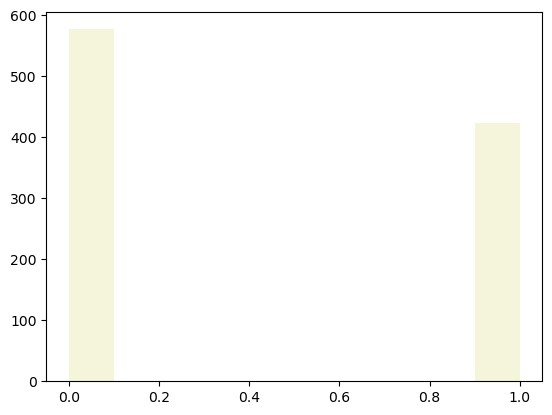

In [170]:
plt.hist(Assuage_df['Distress Level'].values, color="beige")
plt.show()

In [171]:
Assuage_df.describe()

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.536000,82.377000,111.238500,66.642100,26.559570,10.401441,147.67800,4.22700,4530.354000,227.445700,272.277000,65.452000,32.58700,54.541000,14.171700,5.665000,5.478000,0.423000
std,2.290404,12.970316,7.303233,5.352901,4.907742,6.558680,88.41392,2.34904,2310.105804,119.273344,94.253541,37.850024,7.64427,19.890298,1.974215,2.867926,2.849849,0.494283
min,1.000000,55.000000,92.500000,53.500000,18.010000,-2.416000,0.00000,-1.50000,511.000000,-14.600000,61.000000,1.000000,20.00000,10.000000,9.700000,1.000000,1.000000,0.000000
25%,3.000000,73.000000,106.000000,62.600000,22.317500,4.623500,69.00000,2.50000,2569.500000,127.025000,194.000000,32.000000,26.00000,40.000000,12.800000,3.000000,3.000000,0.000000
50%,5.000000,82.000000,111.500000,66.500000,26.645000,10.290000,150.00000,4.00000,4534.000000,227.300000,271.000000,64.000000,33.00000,55.000000,14.150000,6.000000,5.000000,0.000000
75%,6.000000,92.000000,116.500000,70.600000,30.790000,15.724250,226.50000,6.00000,6484.750000,328.375000,350.000000,99.000000,39.00000,69.000000,15.500000,8.000000,8.000000,1.000000
max,8.000000,110.000000,130.000000,80.300000,34.990000,23.281000,300.00000,10.00000,8494.000000,463.600000,479.000000,130.000000,45.00000,100.000000,19.000000,10.000000,10.000000,1.000000


<Axes: >

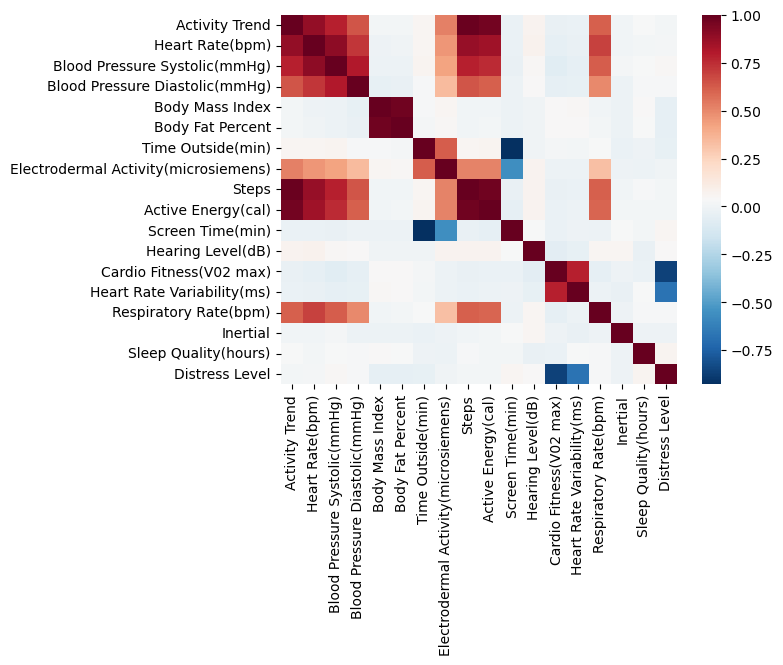

In [172]:
Assuage_df.corr(numeric_only=True)
sb.heatmap(Assuage_df.corr(numeric_only=True), cmap="RdBu_r")

In [173]:
Assuage_df.describe()

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.536000,82.377000,111.238500,66.642100,26.559570,10.401441,147.67800,4.22700,4530.354000,227.445700,272.277000,65.452000,32.58700,54.541000,14.171700,5.665000,5.478000,0.423000
std,2.290404,12.970316,7.303233,5.352901,4.907742,6.558680,88.41392,2.34904,2310.105804,119.273344,94.253541,37.850024,7.64427,19.890298,1.974215,2.867926,2.849849,0.494283
min,1.000000,55.000000,92.500000,53.500000,18.010000,-2.416000,0.00000,-1.50000,511.000000,-14.600000,61.000000,1.000000,20.00000,10.000000,9.700000,1.000000,1.000000,0.000000
25%,3.000000,73.000000,106.000000,62.600000,22.317500,4.623500,69.00000,2.50000,2569.500000,127.025000,194.000000,32.000000,26.00000,40.000000,12.800000,3.000000,3.000000,0.000000
50%,5.000000,82.000000,111.500000,66.500000,26.645000,10.290000,150.00000,4.00000,4534.000000,227.300000,271.000000,64.000000,33.00000,55.000000,14.150000,6.000000,5.000000,0.000000
75%,6.000000,92.000000,116.500000,70.600000,30.790000,15.724250,226.50000,6.00000,6484.750000,328.375000,350.000000,99.000000,39.00000,69.000000,15.500000,8.000000,8.000000,1.000000
max,8.000000,110.000000,130.000000,80.300000,34.990000,23.281000,300.00000,10.00000,8494.000000,463.600000,479.000000,130.000000,45.00000,100.000000,19.000000,10.000000,10.000000,1.000000


In [174]:
Assuage_df[Assuage_df["Active Energy(cal)"] <= 0] 

,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
21,2024-03-01 16:50:58,1,74,112.0,64.2,29.55,14.365,41,-1.5,523,-1.85,434,104,21,46,12.4,4,7,1
25,2024-03-01 03:25:10,1,55,96.5,62.9,23.21,8.123,170,3.5,659,-0.05,301,127,22,52,10.5,3,8,1
39,2024-03-01 05:47:29,1,61,101.5,60.9,28.80,11.390,0,-0.5,627,-6.65,443,60,23,32,10.1,4,10,1
42,2024-03-01 12:34:32,1,58,96.0,61.6,28.87,15.481,99,1.5,770,-7.50,281,10,25,36,10.8,3,10,1
55,2024-03-01 10:28:54,1,56,93.0,59.8,33.96,19.098,93,1.5,548,-4.60,335,80,35,46,13.6,6,4,0
157,2024-03-01 16:50:31,1,71,103.5,63.1,32.37,18.031,21,1.5,668,-14.60,424,77,38,67,12.1,7,3,0
184,2024-03-01 06:14:56,1,58,100.0,55.0,33.28,20.214,173,0.5,678,-3.10,197,61,24,29,11.8,10,9,1
783,2024-03-01 19:45:05,1,64,99.0,57.4,26.08,8.854,233,4.5,756,-8.20,205,52,38,85,11.4,9,9,0
992,2024-03-01 08:04:06,1,73,110.5,68.3,30.44,13.522,15,1.5,592,-4.40,352,78,29,40,15.3,6,7,1


In [175]:
target_column = "Distress Level"
feature_columns = ["Activity Trend","Heart Rate(bpm)","Blood Pressure Systolic(mmHg)","Blood Pressure Diastolic(mmHg)",
                   "Body Mass Index","Body Fat Percent","Time Outside(min)","Electrodermal Activity(microsiemens)","Steps","Active Energy(cal)",
                   "Screen Time(min)","Hearing Level(dB)","Cardio Fitness(V02 max)","Heart Rate Variability(ms)","Respiratory Rate(bpm)","Inertial",
                   "Sleep Quality(hours)"]

In [176]:
bc = Assuage_df
X, y = Assuage_df[feature_columns], Assuage_df[target_column].to_numpy()

n_samples, n_features = X.shape
print(f'number of samples: {n_samples}, number of features: {n_features}')

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

number of samples: 1000, number of features: 17


In [177]:
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
    def predict(self, x):
        with torch.no_grad():
            y_predicted = self(x)
            y_predicted_cls = y_predicted.round()
        return y_predicted_cls
    
model = LogisticRegression(n_features)

In [178]:
# Loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [179]:
# training loop
num_epochs = 250

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.6929
epoch: 20, loss = 0.6612
epoch: 30, loss = 0.6328
epoch: 40, loss = 0.6073
epoch: 50, loss = 0.5844
epoch: 60, loss = 0.5636
epoch: 70, loss = 0.5447
epoch: 80, loss = 0.5275
epoch: 90, loss = 0.5118
epoch: 100, loss = 0.4973
epoch: 110, loss = 0.4839
epoch: 120, loss = 0.4716
epoch: 130, loss = 0.4601
epoch: 140, loss = 0.4495
epoch: 150, loss = 0.4395
epoch: 160, loss = 0.4302
epoch: 170, loss = 0.4215
epoch: 180, loss = 0.4133
epoch: 190, loss = 0.4056
epoch: 200, loss = 0.3984
epoch: 210, loss = 0.3915
epoch: 220, loss = 0.3851
epoch: 230, loss = 0.3789
epoch: 240, loss = 0.3731
epoch: 250, loss = 0.3676


In [180]:
with torch.no_grad():
    y_predicted = model(X_test)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9300
